In [1]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import numpy as np
import pathlib
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation



In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # set up seed
tf.random.set_seed(42)

#Preprocess data aka Scaling / Normalization
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup path
train_dir = "D:/UM/Soft Computing/Individual Assignment/data/train"
test_dir = "D:/UM/Soft Computing/Individual Assignment/data/test"
# Import data form dir
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                            batch_size = 32,
                                            target_size= (224,224),
                                            class_mode = "binary",
                                            seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                            batch_size = 32,
                                            target_size= (224,224),
                                            class_mode = "binary",
                                            seed = 42)

#Build CNN model
model_TinyVGG = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(filters = 10, kernel_size = 3,                                                        
                            activation = "relu",
                            input_shape= (224,224,3)),
     tf.keras.layers.Conv2D(10,3, activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=2, padding = "valid"),
     tf.keras.layers.Conv2D(10,3, activation="relu"),
     tf.keras.layers.Conv2D(10,3, activation="relu"),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")
    ])

#Compile our CNN
model_TinyVGG.compile(loss="binary_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

history_model_TinyVGG =model_TinyVGG.fit(train_data,epochs =4, steps_per_epoch = len(train_data)/2, validation_data = valid_data, validation_steps = len(valid_data))

Found 6555 images belonging to 2 classes.
Found 998 images belonging to 2 classes.
Epoch 1/4
102/102 [==============================] - 52s 503ms/step - loss: 0.3661 - accuracy: 0.8359 - val_loss: 0.4492 - val_accuracy: 0.7976
Epoch 2/4
102/102 [==============================] - 52s 506ms/step - loss: 0.2832 - accuracy: 0.8894 - val_loss: 0.3412 - val_accuracy: 0.8798
Epoch 3/4
102/102 [==============================] - 52s 503ms/step - loss: 0.2501 - accuracy: 0.9058 - val_loss: 0.4842 - val_accuracy: 0.7986
Epoch 4/4
102/102 [==============================] - 51s 501ms/step - loss: 0.2126 - accuracy: 0.9189 - val_loss: 0.4448 - val_accuracy: 0.8086


In [4]:
# turn our training path into a Python path
data_dir = pathlib.Path("D:/UM/Soft Computing/Individual Assignment/data/train/") 
# created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 

In [5]:
def plot_loss_accuracy_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

def pred_and_plot(filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model_TinyVGG.predict(tf.expand_dims(img, axis=0))
  print(pred)
  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
    
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor|
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [6]:
model_TinyVGG.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

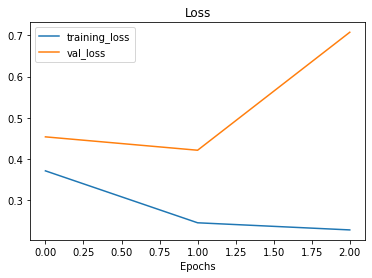

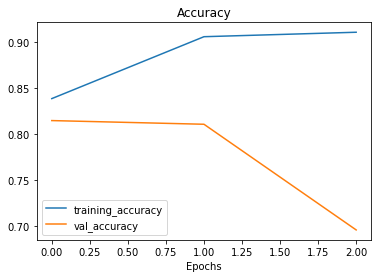

In [7]:
plot_loss_accuracy_curves(history_model_TinyVGG)

[[0.9510427]]


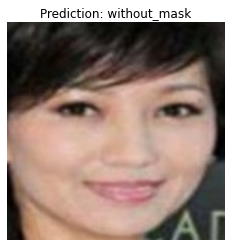

In [8]:
pred_and_plot("D:/UM/Soft Computing/Individual Assignment/data/test/without_mask/without_mask_3357.jpg", class_names)


[[0.5105109]]


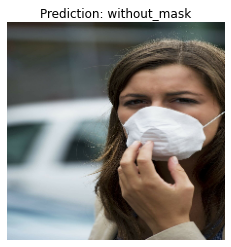

In [9]:
pred_and_plot( "D:/UM/Soft Computing/Individual Assignment/data/test/with_mask/with_mask_3357.jpg", class_names)


In [ ]:
pred_and_plot( "D:/UM/Soft Computing/Individual Assignment/data/test/with_mask/with_mask_3230.jpg", class_names)

In [ ]:
pred_and_plot( "D:/UM/Soft Computing/Individual Assignment/data/test/with_mask/with_mask_3244.jpg", class_names)

In [ ]:
pred_and_plot("D:/UM/Soft Computing/Individual Assignment/data/test/without_mask/without_mask_3342.jpg", class_names)


In [ ]:
pred_and_plot("D:/UM/Soft Computing/Individual Assignment/data/test/without_mask/without_mask_3343.jpg", class_names)


In [1]:
pred_and_plot("D:/UM/Soft Computing/Individual Assignment/data/test/without_mask/without_mask_3344.jpg", class_names)


NameError: name 'pred_and_plot' is not defined